In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
df = pd.read_csv("../data/metadata.csv")
df.describe()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Vertices,AverageSize,DiagonalSize,Cells
count,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2.483000e+03,2.483000e+03,2483.000000
mean,1241.000000,1241.000000,1241.000000,1241.000000,5609.783327,5.735999e+04,2.055363e+05,10691.525977
std,716.924682,716.924682,716.924682,716.924682,9851.159563,2.857743e+06,1.024007e+07,16191.234208
min,0.000000,0.000000,0.000000,0.000000,16.000000,1.682475e-02,7.961316e-02,16.000000
25%,620.500000,620.500000,620.500000,620.500000,489.500000,2.526283e-01,1.116272e+00,924.000000
50%,1241.000000,1241.000000,1241.000000,1241.000000,1826.000000,3.367296e-01,1.354865e+00,3615.000000
75%,1861.500000,1861.500000,1861.500000,1861.500000,6306.500000,4.956336e-01,2.149745e+00,13363.500000
max,2482.000000,2482.000000,2482.000000,2482.000000,98256.000000,1.424005e+08,5.102597e+08,129881.000000


In [6]:
rdf = pd.DataFrame(df["Class"].value_counts())
print(rdf)

                 Class
Jet                143
Humanoid           142
Car                 89
Insect              66
PlantIndoors        65
...                ...
Monitor             20
Wheel               17
AircraftBuoyant     16
Hat                 15
Sign                15

[69 rows x 1 columns]


/var/folders/4d/ntyf354s19739_77yyhpww0h0000gn/T/ipykernel_19160/2593348157.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Cells', data=df, palette=['#1f77b4', '#ff7f0e'], order=class_order)
/var/folders/4d/ntyf354s19739_77yyhpww0h0000gn/T/ipykernel_19160/2593348157.py:6: UserWarning: 
The palette list has fewer values (2) than needed (69) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Class', y='Cells', data=df, palette=['#1f77b4', '#ff7f0e'], order=class_order)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


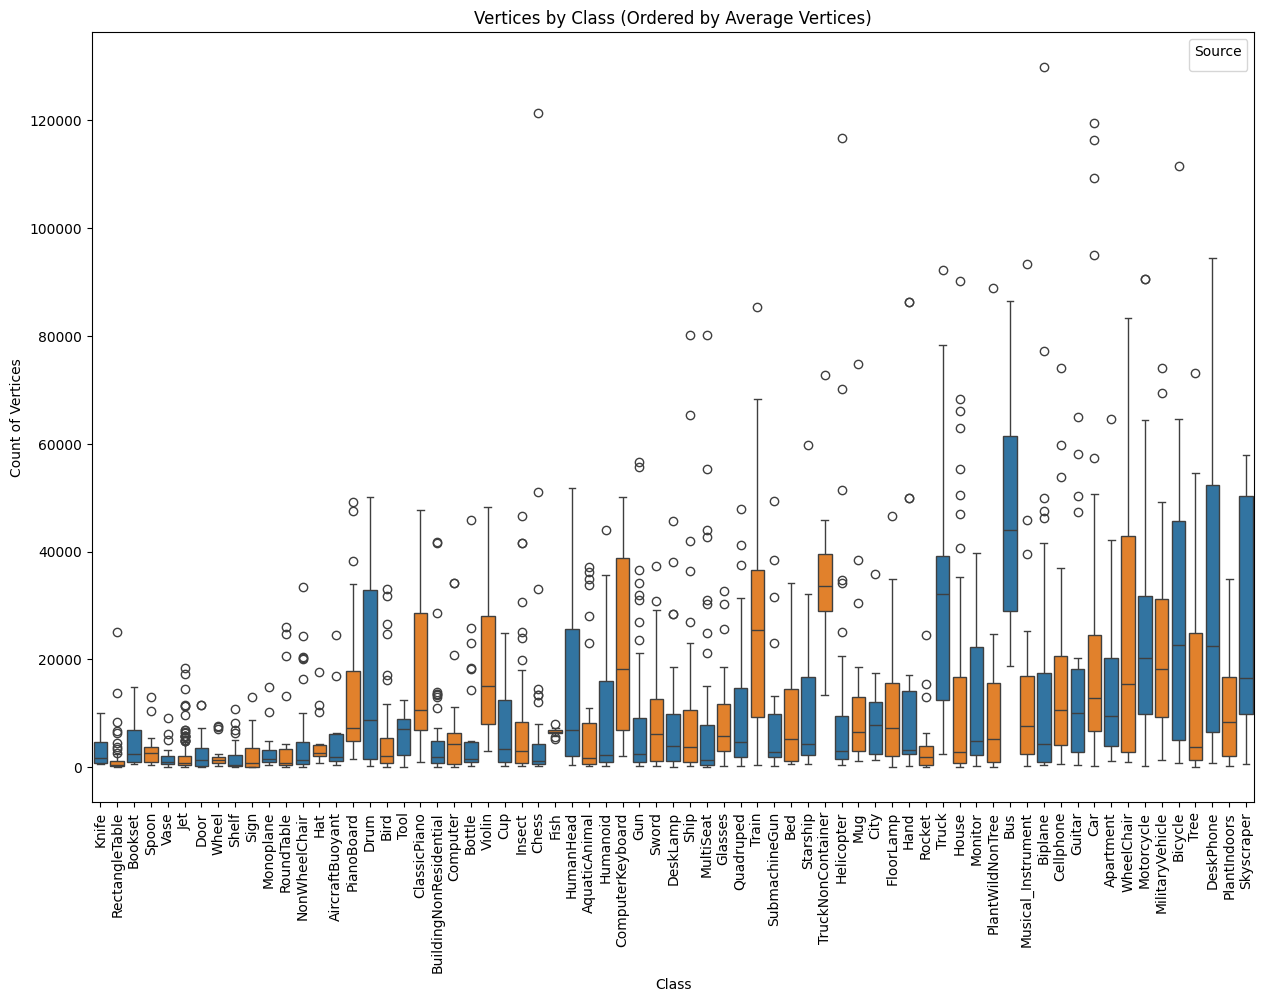

In [11]:
# Calculate the order of classes based on the mean of 'Vertices'
class_order = df.groupby('Class')['Vertices'].mean().sort_values().index

# Create the side-by-side boxplots with ordered classes
plt.figure(figsize=(15, 10))
sns.boxplot(x='Class', y='Cells', data=df, palette=['#1f77b4', '#ff7f0e'], order=class_order)
plt.title('Vertices by Class (Ordered by Average Vertices)')
plt.xlabel('Class')
plt.ylabel('Count of Vertices')
plt.xticks(rotation=90)  # Rotate class labels for better readability
plt.legend(title='Source')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


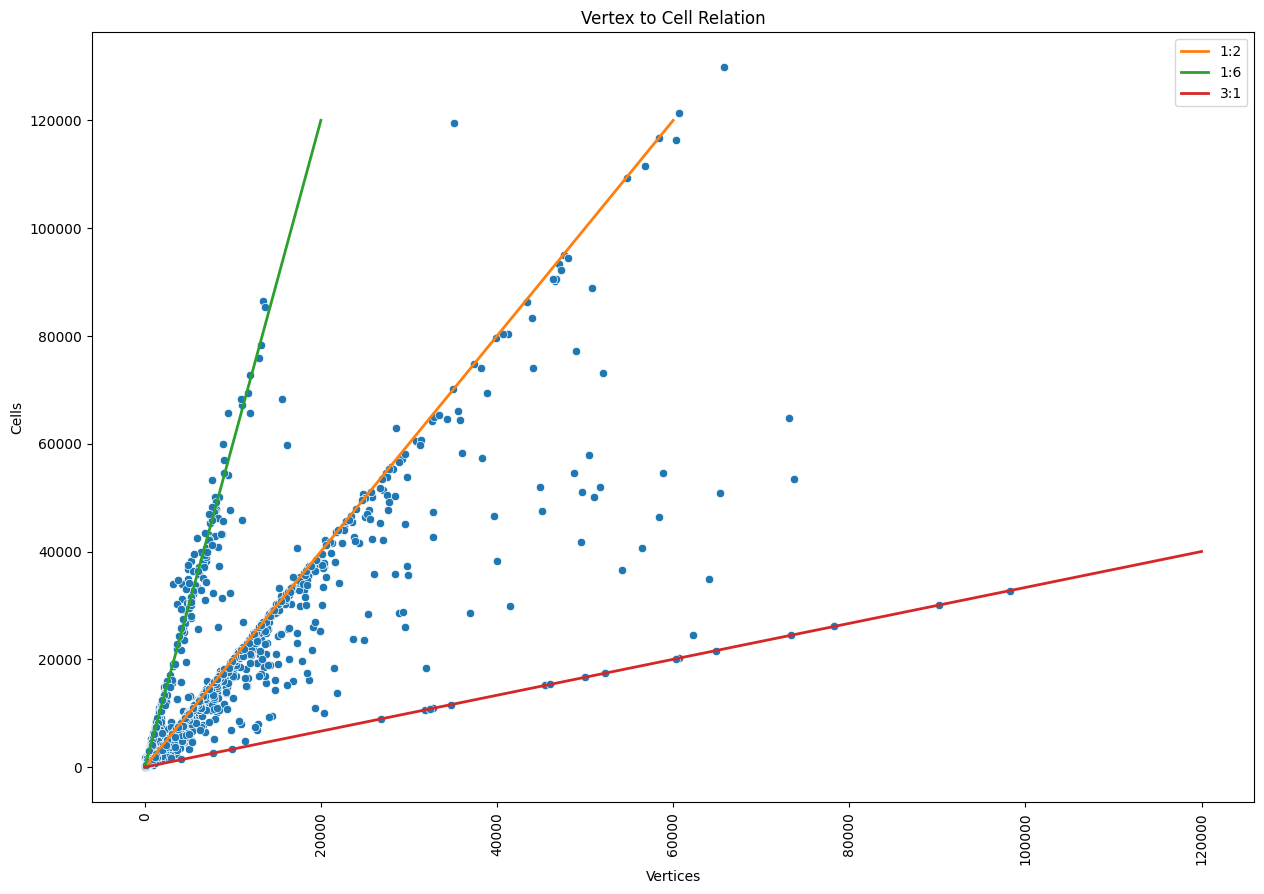

In [12]:
data = pd.DataFrame(data={"Vertices":df["Vertices"],"Cells":df["Cells"]})


plt.figure(figsize=(15, 10))
sns.scatterplot(x='Vertices', y='Cells', data=data)
plt.plot([1, 1], [120000, 120000],linewidth=2)

plt.title('Vertex to Cell Relation')
plt.xlabel('Vertices')
plt.ylabel('Cells')
plt.xticks(rotation=90)  # Rotate class labels for better readability
plt.legend(title='Source')
plt.plot([0, 60000], [0, 120000], linewidth=2, label="1:2")
plt.plot([0, 20000], [0, 120000], linewidth=2, label="1:6")
plt.plot([0, 120000], [0, 40000], linewidth=2, label="3:1")

plt.legend()
plt.show()

In [13]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ground_truth', y='sampling', data=rdf)
plt.title('Diagonal Heuristic Evaluation')
plt.xlabel('Brute Force')
plt.ylabel('Heuristic')
plt.plot([0, np.sqrt(3)], [0, np.sqrt(3)], linewidth=2, label="expected",color="green")


ValueError: Could not interpret value `ground_truth` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [28]:
dfmanifest = pd.read_csv("shape_manifest.csv")
dfmanifest["Path"]=dfmanifest["Path"].apply(func=(lambda x: x.replace("\\","/")))
df["Path"]=df["Path"].apply(func=(lambda x: x.replace("\\","/")))
df_sub = df[["Vertices","Path","Cells"]]


In [48]:
other_data = pd.DataFrame(data={"Vertices":df["Vertices"],"Cells":df["Cells"],"Path":df["Path"]})
other_data.set_index("Path")
joined_data = failed_meta.merge(other_data,on=["Path","Cells","Vertices"],how="right")

joined_data.loc[pd.isna(joined_data['Color']),'Color'] = "Blue"
print(joined_data.head())

In [73]:
mesh_features = pd.read_csv("mesh_features.csv")

print("D00348.obj" in mesh_features["mesh_name"].values)
print(mesh_features.loc[mesh_features["mesh_name"]=="D00348.obj"])